In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

# Je commence par importer toutes les librairies qui pourraient me servir dans mes analyses.

In [135]:
data=pd.read_csv("consoelechphc.csv")
data.head()
# J'ai tout d'abord converti mon fichier EDF numbers en fichier csv avec virgule pour une bonne lecture des colonnes.

,Date de relevé de l'index,Type d'index,Index Heures creuses (kWh),Index Heures pleines (kWh)
0,02/01/2023,Index transmis par le distributeur,3811,2325
1,01/01/2023,Index transmis par le distributeur,3802,2319
2,31/12/2022,Index transmis par le distributeur,3795,2314
3,30/12/2022,Index transmis par le distributeur,3782,2308
4,29/12/2022,Index transmis par le distributeur,3775,2303


In [20]:
data.shape
# On peut constater qu'il y a 487 lignes et 3 colonnes.

(503, 4)

In [82]:
data.dtypes
# 1)Le premier reflexe est de vérifier que toutes les variables sont importées dans le bon type.
# Dans le cas présent, on peut voir que Date de consommation est de type object et non pas de type date.

Type d'index                  object
Index Heures creuses (kWh)     int64
Index Heures pleines (kWh)     int64
dtype: object

In [28]:
data.isnull().sum()
# 2)On remarque qu'il n'y a pas de valeurs manquantes.

Date de relevé de l'index     0
Type d'index                  0
Index Heures creuses (kWh)    0
Index Heures pleines (kWh)    0
dtype: int64

In [24]:
data.loc[data[["Date de relevé de l'index", "Type d'index", "Index Heures creuses (kWh)", "Index Heures pleines (kWh)"]].duplicated(keep=False),:]
# 3)On remarque qu"il y a deux lignes qui se repètent et de même date avec les mêmes données. On constate qu'il y a donc un doublon.

,Date de relevé de l'index,Type d'index,Index Heures creuses (kWh),Index Heures pleines (kWh)
501,03/10/2020,Index transmis par le distributeur,30178,6889
502,03/10/2020,Index transmis par le distributeur,30178,6889


In [29]:
data.drop_duplicates(subset=["Date de relevé de l'index", "Type d'index", "Index Heures creuses (kWh)", "Index Heures pleines (kWh)"], inplace=True, ignore_index=True)
# On supprime une des deux lignes du doublon.

In [30]:
data.loc[data[["Date de relevé de l'index", "Type d'index", "Index Heures creuses (kWh)", "Index Heures pleines (kWh)"]].duplicated(keep=False),:]
# On vérifie si le doublon apparaît toujours. On constate donc que l'un des deux lignes a bien été supprimé.

,Date de relevé de l'index,Type d'index,Index Heures creuses (kWh),Index Heures pleines (kWh)


In [25]:
data.describe()
# 4) On peut remarquer plusieurs données incohérentes. Il y a donc des outliers. Notamment le max heures creuses.

,Index Heures creuses (kWh),Index Heures pleines (kWh)
count,503.000000,503.000000
mean,2406.898608,1338.502982
std,3047.087827,883.986704
min,0.000000,0.000000
25%,1239.000000,731.000000
50%,2244.000000,1379.000000
75%,3037.000000,1829.500000
max,32230.000000,8411.000000


In [43]:
data.loc[data["Index Heures creuses (kWh)"]==32230].index[0]
# Récupération de l'index de la transaction 32230 de l'index 498.
data.head(499)

,Date de relevé de l'index,Type d'index,Index Heures creuses (kWh),Index Heures pleines (kWh)
0,02/01/2023,Index transmis par le distributeur,3811,2325
1,01/01/2023,Index transmis par le distributeur,3802,2319
2,31/12/2022,Index transmis par le distributeur,3795,2314
3,30/12/2022,Index transmis par le distributeur,3782,2308
4,29/12/2022,Index transmis par le distributeur,3775,2303
...,...,...,...,...
494,12/08/2021,Index transmis par le distributeur,255,162
495,12/07/2021,Index transmis par le distributeur,43,32
496,09/07/2021,Index transmis par le distributeur,19,19
497,06/07/2021,Index transmis par le distributeur,0,0


L'analyse univariée. Voici les 3 mesures de tendance centrale :

In [46]:
data["Index Heures creuses (kWh)"].mode()

0          0
1         19
2         43
3        255
4        332
       ...  
497     3811
498    30178
499    31290
500    31322
501    32230
Name: Index Heures creuses (kWh), Length: 502, dtype: int64

In [50]:
Moy_HP=data["Index Heures pleines (kWh)"].mean()
print(Moy_HP)
# Ici on a calculé la moyenne de consommation kWh durant les heures pleines.

Moy_HC=data["Index Heures creuses (kWh)"].mean()
print(Moy_HC)
# Ici on a calculé la moyenne de consommation kWh durant les heures creuses.

1327.4462151394423
2351.577689243028


In [52]:
Med_HP=data["Index Heures pleines (kWh)"].median()
print(Med_HP)

Med_HC=data["Index Heures creuses (kWh)"].median()
print(Med_HC)

# Ici on remarque qu"il n'y a pas de outliers puisque la moyenne correspond presque à la médiane. 

1377.0
2240.5


Les mesures de dispersion :

In [55]:
data["Index Heures pleines (kWh)"].var()
# Ici nous avons calculé la variance empirique sans biais sur l'index des heures pleines.

721376.6947062054

In [56]:
data["Index Heures pleines (kWh)"].std()
# Ici nous avons calculé l'écart-type empirique qui est juste la racine carrée de la variance empirique.

849.3389751484418

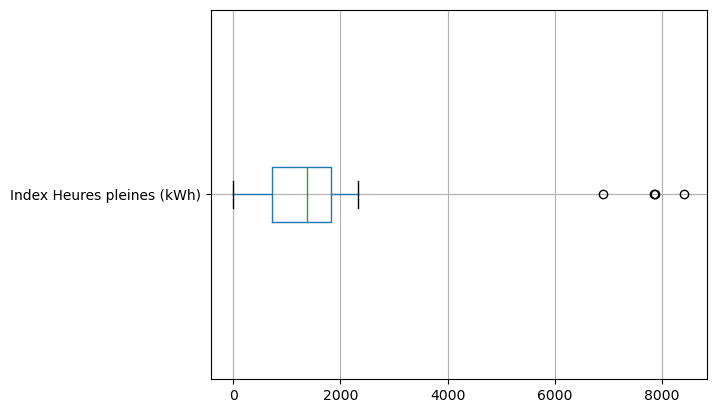

In [57]:
data.boxplot(column="Index Heures pleines (kWh)", vert=False)
plt.show()
# Ici nous avons créer une boîte à moustaches permettant d'avoir une vue globale sur la consommation électrique.La ligne verte représente la médiane. Les deux traits noirs représentes les consos min & max et les ronds représentent des outliers. 

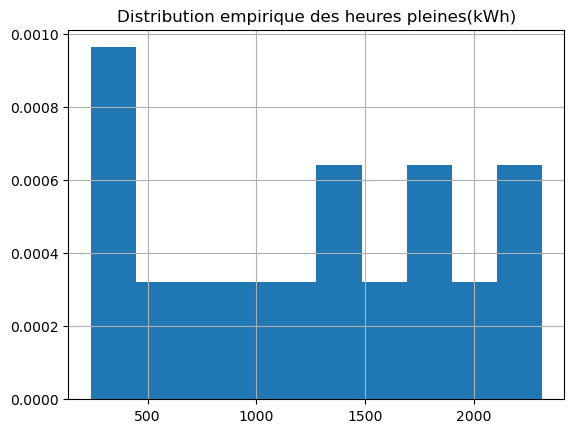

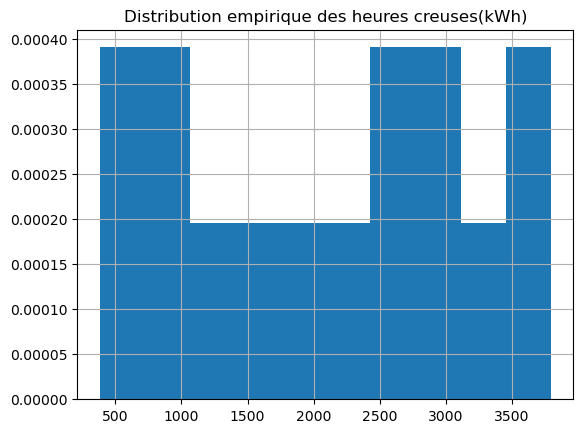

In [217]:
plt.title("Distribution empirique des heures pleines(kWh)")
data["Index Heures pleines (kWh)"].hist(density=True)
plt.show()

plt.title("Distribution empirique des heures creuses(kWh)")
data["Index Heures creuses (kWh)"].hist(density=True)
plt.show()
# Ici nous avons créer une distribution empirique de deux variables : histogramme heures pleines et heures creuses.

In [87]:
data['Index Heures pleines (kWh)'].skew()
# j'ai du mal a comprendre ce que ça représente. ça devrait représenter la symétrie d'une distribution de données autour de sa moyenne.

3.4524261393114397

In [66]:
data['Index Heures pleines (kWh)'].kurtosis()
# j'ai du mal a comprendre ce que ça représente. ça devrait représenter l'aplatissement mais je comprend pas la logique.

25.20040029292452

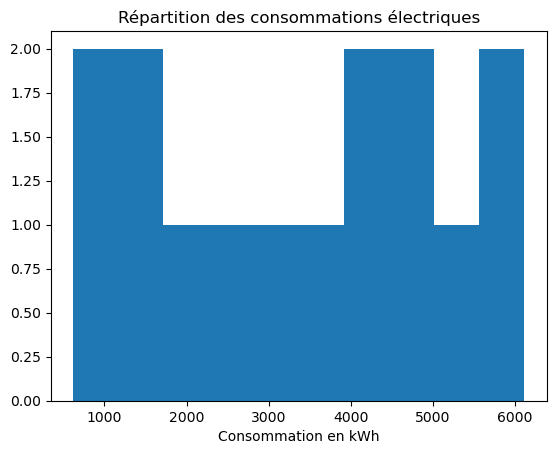

In [218]:
plt.title("Répartition des consommations électriques")
plt.xlabel("Consommation en kWh")
data["consommation_totale"]=data['Index Heures pleines (kWh)']+data['Index Heures creuses (kWh)']
plt.hist(data["consommation_totale"])
plt.show()
#Cela nous donne un aperçu de la répartition des consommations.

In [ ]:
data["date"]=pd.to_datetime(data["date"],format="%d/%m/%Y")
# Cela permet de mettre la colonne au bon format.

data.set_index("date", inplace=True)
#Réindexation du dataframe sur la colonne "date".

data["date"]=data["Date de relevé de l'index"]
#J'arrive pas à faire ce que je veux.

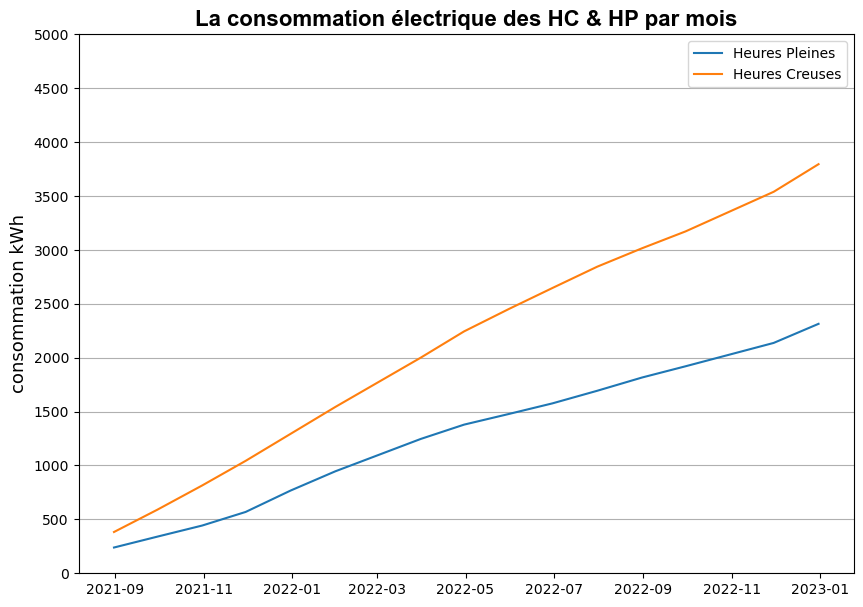

In [205]:
data["cons_mens_hp"]=data["Index Heures pleines (kWh)"].resample("M").sum()
data["cons_mens_hc"]=data["Index Heures creuses (kWh)"].resample("M").sum()

plt.figure(figsize=(10,7))
plt.plot(data.index, data["cons_mens_hp"], label="Heures Pleines")
plt.plot(data.index, data["cons_mens_hc"], label="Heures Creuses")
plt.legend(loc="upper right")
plt.ylabel("consommation kWh", fontsize=13)
plt.ylim(0, 5000)
plt.yticks([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000])
plt.grid(axis="y")
plt.title("La consommation électrique des HC & HP par mois", fontsize=16, fontname="Arial",fontweight="bold")
plt.show()

# Je pense qu'il y a une erreur.
# Nous pouvons voir que la consommation électrique au fur et à mesure des années n'a cessé d'augmenter.

In [204]:
data.sort_index(inplace=True)
#Tri de l'index dans l'ordre croissant
print(data.tail())
# Permet de voir si il y a des valeurs manquantes. Nous voyons qu'il y en a en fin de tableau.

           Date de relevé de l'index                        Type d'index  \
date                                                                       
2022-07-31                31/07/2022  Index transmis par le distributeur   
2022-08-31                31/08/2022  Index transmis par le distributeur   
2022-09-30                30/09/2022  Index transmis par le distributeur   
2022-11-30                30/11/2022  Index transmis par le distributeur   
2022-12-31                31/12/2022  Index transmis par le distributeur   

            Index Heures creuses (kWh)  Index Heures pleines (kWh)    HP  \
date                                                                       
2022-07-31                        2844                        1693  1693   
2022-08-31                        3015                        1816  1816   
2022-09-30                        3171                        1920  1920   
2022-11-30                        3539                        2137  2137   
2022-12-31 

In [178]:
data.dropna(inplace=True)
#Cette fonction m'a permis de supprimer les lignes ou les valeurs étaient inscrite "NaN". 
#Suite à cela, j'ai pu reéxécuter mon plot et j'ai pu voir les courbes HP et HC au dessus.


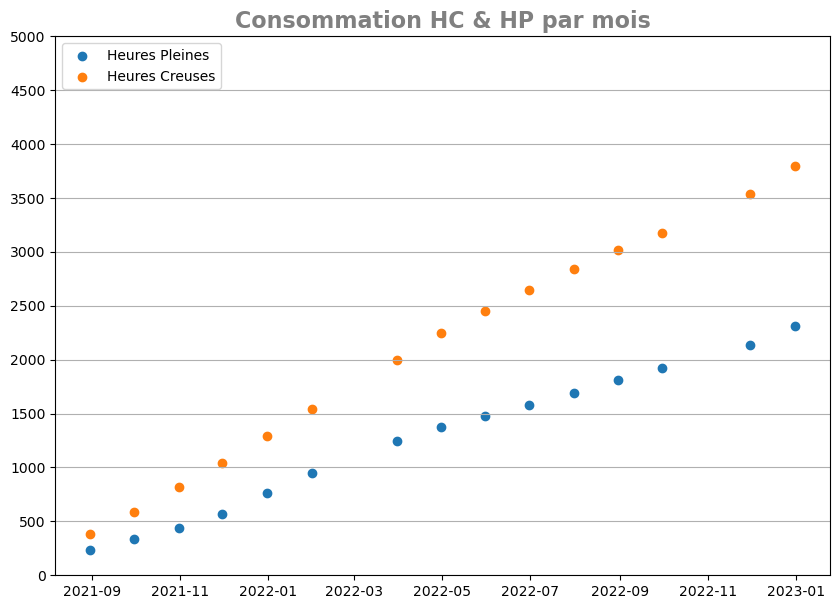

In [219]:
#Essayons de reproduire cela mais sous forme de nuages de points.
plt.figure(figsize=(10,7))
plt.scatter(data.index,data["cons_mens_hp"], label="Heures Pleines")
plt.scatter(data.index,data["cons_mens_hc"], label="Heures Creuses")
plt.legend(loc="upper left")
plt.title("Consommation HC & HP par mois", fontweight="bold", fontsize=16, c="grey")
plt.ylim(0,5000)
plt.yticks([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000])
plt.grid(axis="y")
plt.show()

